In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from collections import OrderedDict

from dataexploration import *

In [2]:
path = r"E:\ST-Net\data\hist2tscript\BRCA"

In [4]:
dico = common_genes(path)

100%|██████████| 23/23 [06:23<00:00, 16.67s/it]


Text(0.5, 1.0, 'Number of genes in different tissues')

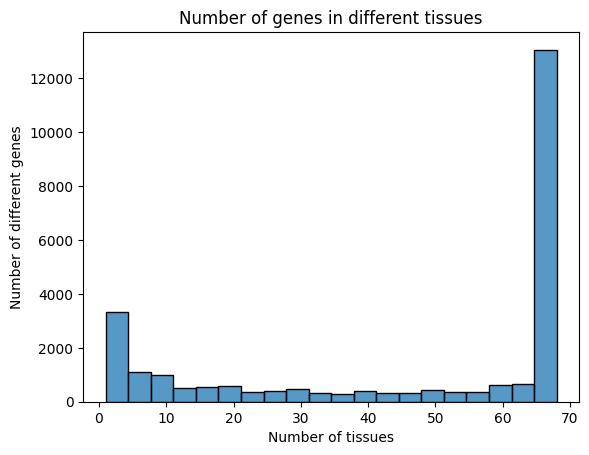

In [42]:
sns.histplot(list(dico.values()))
plt.xlabel("Number of tissues")
plt.ylabel("Number of different genes")
plt.title("Number of genes in different tissues")

In [3]:
with open(path + r'\std_genes.pkl', 'rb') as f:
    std_genes = pkl.load(f)

Text(0.5, 1.0, 'Distribution of the standard deviation among common genes')

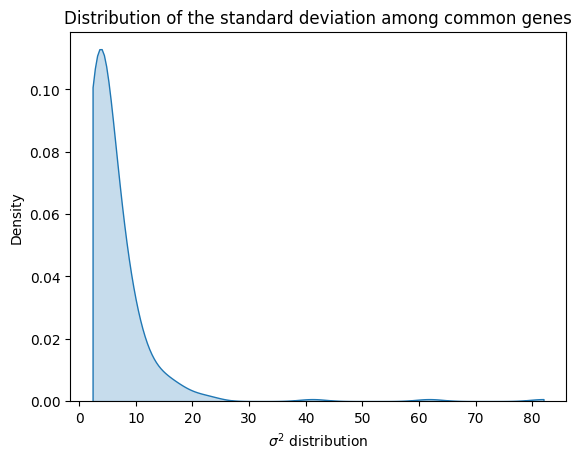

In [20]:
sns.kdeplot(std_genes[:250], fill=True, cut=0)
plt.xlabel("$\sigma^2$ distribution")
plt.title("Distribution of the standard deviation among common genes")

In [10]:
std_genes

ENSG00000149273    81.979891
ENSG00000160180    61.806943
ENSG00000254709    41.173278
ENSG00000105640    22.533787
ENSG00000137818    22.508527
                     ...    
ENSG00000185973     0.078289
ENSG00000125551     0.077996
ENSG00000116771     0.076484
ENSG00000197013     0.075626
ENSG00000188295     0.073872
Length: 11488, dtype: float64